# Analyzing Historical Stock/Revenue Data and Building a Dashboard

In [6]:
# ==============================================================
# Part 1: Extract Tesla Stock Data
# ==============================================================

import yfinance as yf
import pandas as pd

# Tesla Stock Data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Convert Date to datetime
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])

# Save Data
tesla_data.to_csv("tesla_stock.csv", index=False)

# Display first five rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [7]:
# ==============================================================
# Part 2: Extract Tesla Revenue Data (Webscraping)
# ==============================================================

import requests
from bs4 import BeautifulSoup
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url, headers={"User-Agent":"Mozilla/5.0"}).text

soup = BeautifulSoup(html_data, "html.parser")

# Use StringIO with html5lib flavor
tables = pd.read_html(StringIO(str(soup)), flavor="html5lib")

# Select correct table
for table in tables:
    if "Tesla Quarterly Revenue" in table.columns[0]:
        tesla_revenue = table
        break

# Clean Data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"\$|,", "", regex=True).astype(float)

# Convert Date to datetime
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Save
tesla_revenue.to_csv("tesla_revenue.csv", index=False)

# Display last five rows
tesla_revenue.tail()


,Date,Revenue
59,2010-09-30,31.0
60,2010-06-30,28.0
61,2010-03-31,21.0
63,2009-09-30,46.0
64,2009-06-30,27.0


In [8]:
# ==============================================================
# Part 3: Extract GameStop Stock Data
# ==============================================================

# GameStop Stock Data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Convert Date to datetime
gme_data["Date"] = pd.to_datetime(gme_data["Date"])

# Save Data
gme_data.to_csv("gme_stock.csv", index=False)

# Display first five rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [9]:
# ==============================================================
# Part 4: Extract GameStop Revenue Data (Webscraping)
# ==============================================================

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url, headers={"User-Agent":"Mozilla/5.0"}).text

soup = BeautifulSoup(html_data, "html.parser")

# Use StringIO with html5lib flavor
tables = pd.read_html(StringIO(str(soup)), flavor="html5lib")

# Select correct table
for table in tables:
    if "GameStop Quarterly Revenue" in table.columns[0]:
        gme_revenue = table
        break

# Clean Data
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"\$|,", "", regex=True).astype(float)

# Convert Date to datetime
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# Save
gme_revenue.to_csv("gme_revenue.csv", index=False)

# Display last five rows
gme_revenue.tail()


,Date,Revenue
61,2010-01-31,3524.0
62,2009-10-31,1835.0
63,2009-07-31,1739.0
64,2009-04-30,1981.0
65,2009-01-31,3492.0


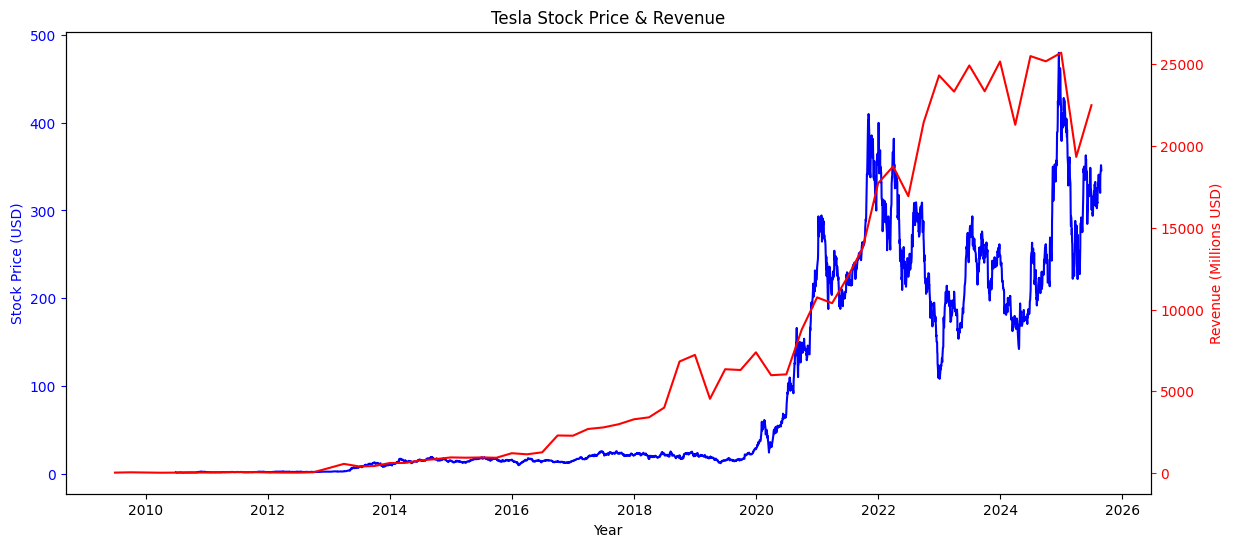

In [10]:
# ==============================================================
# Part 5: Plot Tesla Stock Graph
# ==============================================================

import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14,6))

    ax1.plot(stock_data["Date"], stock_data["Close"], 'b-', label="Stock Price")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Stock Price (USD)", color="b")
    ax1.tick_params("y", colors="b")
    ax1.set_title(f"{stock_name} Stock Price & Revenue")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], 'r-', label="Revenue")
    ax2.set_ylabel("Revenue (Millions USD)", color="r")
    ax2.tick_params("y", colors="r")

    plt.show()

# Plot Tesla
make_graph(tesla_data, tesla_revenue, "Tesla")


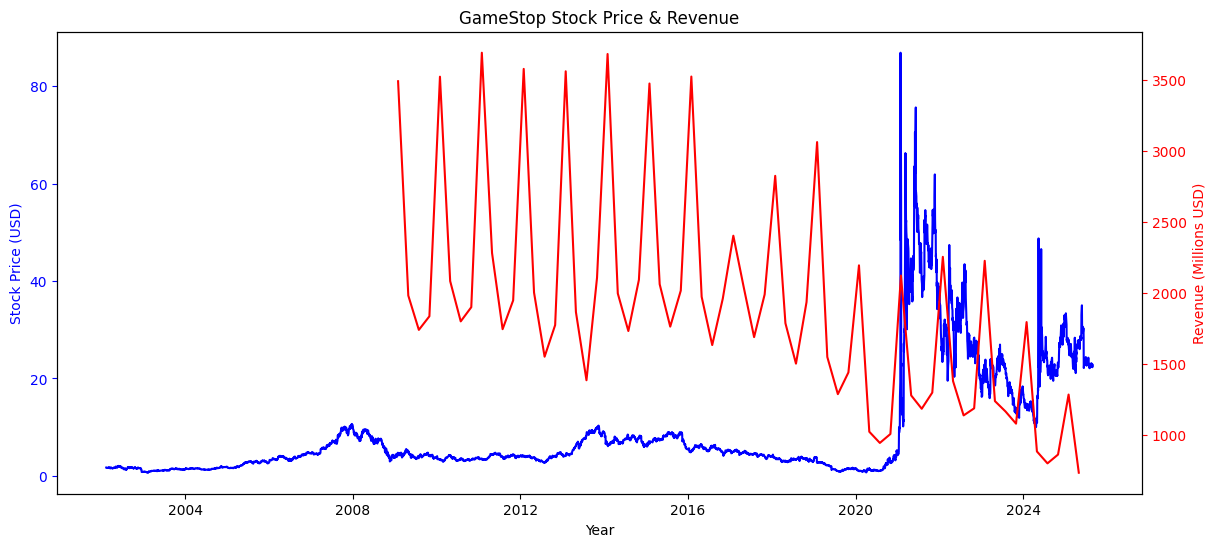

In [11]:
# ==============================================================
# Part 6: Plot GameStop Stock Graph
# ==============================================================

# Plot GameStop
make_graph(gme_data, gme_revenue, "GameStop")


## Author:
Hashim Shaikh